# Machine Learning for Determining Diabetes Risk Factors
## Kineta Padiachee
## 1853416
## Supervisor: Dr. Pravesh Ranchod
## November 2022

-------------------------------------------------------------------------

### Import Libaraires and Packages

In [36]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [37]:
!pip install statsmodels==0.13.2

In [38]:
!pip install imblearn==0.0

In [39]:
!pip install scikit-learn

In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

### Dataset

In [41]:
data = pd.read_csv('diabetes.csv') 
data.shape

(2000, 9)

In [42]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


### Clean dataset by checking for missing values and duplicates 

In [44]:
round(100 * (data.isnull().sum()/len(data)),2).sort_values(ascending=False).head()

Pregnancies      0.0
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64

No missing values found

In [45]:
#data.drop_duplicates(subset=None, inplace=True) #removes any duplicatee entries found within the dataset
#data.shape

### Data Visualization

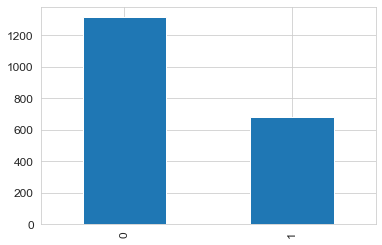

In [46]:
# Distribution of Outcome
data.Outcome.value_counts().plot(kind='bar')
plt.show()

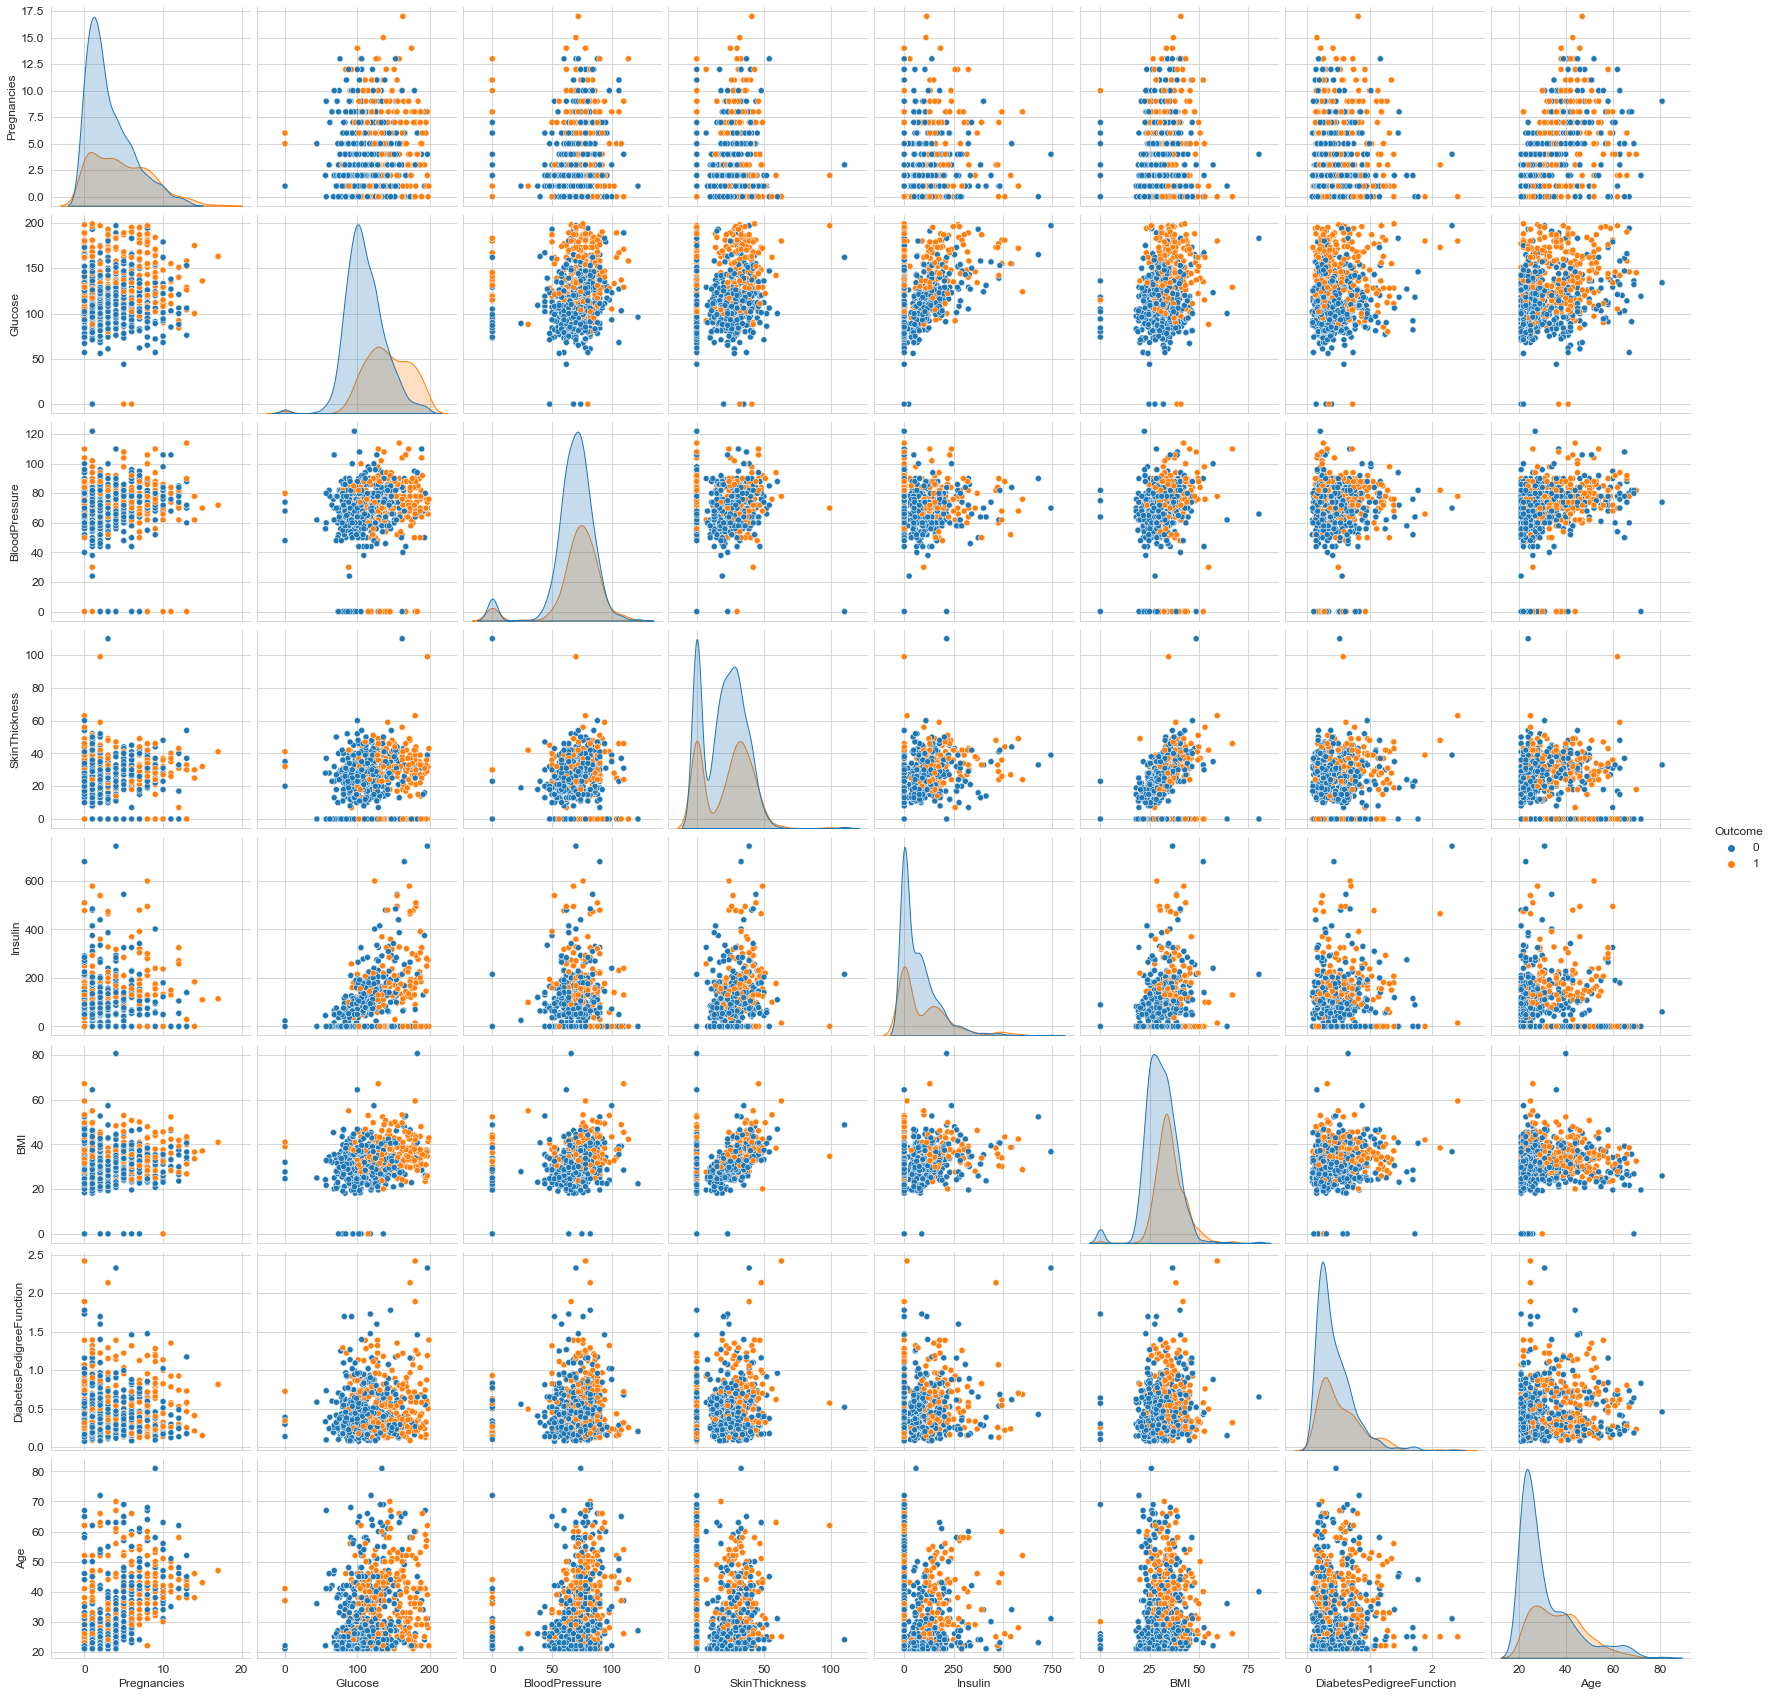

In [47]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Outcome",size=3);
plt.show()

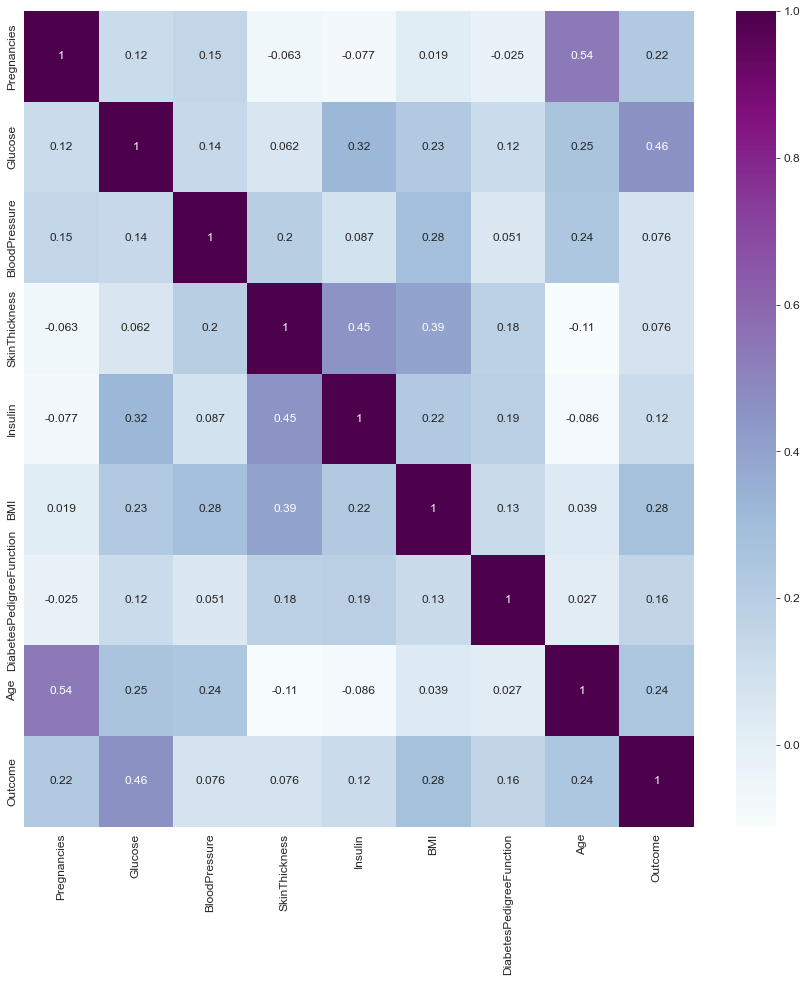

In [72]:
f, ax= plt.subplots(1,1, figsize=(15,15))
ax= sns.heatmap(data.corr(), annot=True, cmap='BuPu')

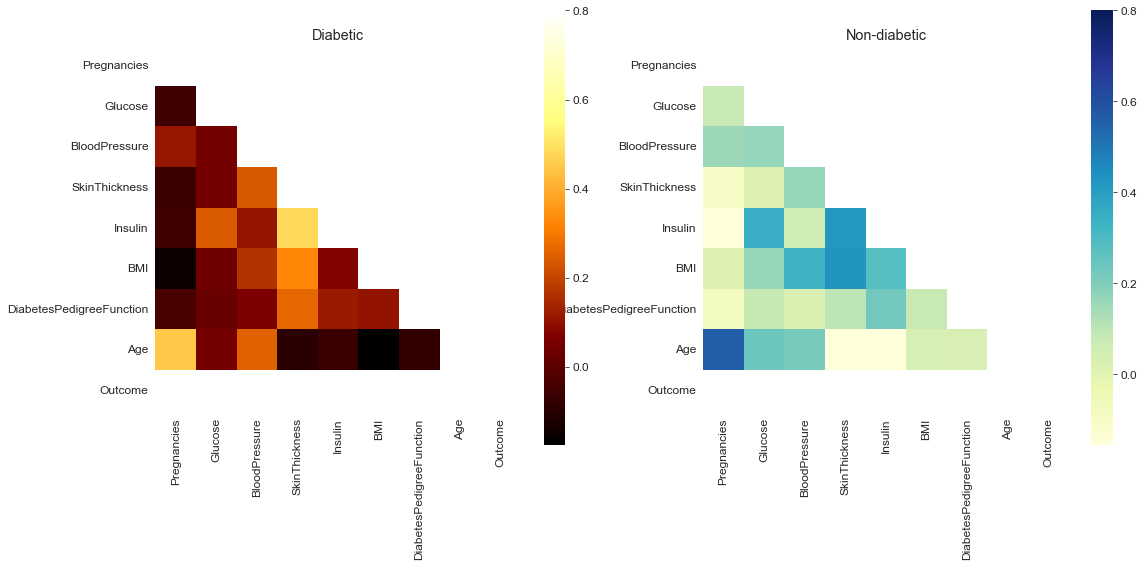

In [48]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 18, 8))
correl = data.corr()
mask = np.zeros_like(correl, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((data.loc[data['Outcome'] == 1]).corr(), vmax = .8, square=True, ax = ax1, cmap = 'afmhot', mask=mask);
ax1.set_title('Diabetic')
sns.heatmap((data.loc[data['Outcome'] == 0]).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu', mask=mask);
ax2.set_title('Non-diabetic')
plt.show()

### Feature Scaling

### Class Imbalance - Balancing Techniques 

<AxesSubplot:xlabel='Outcome', ylabel='count'>

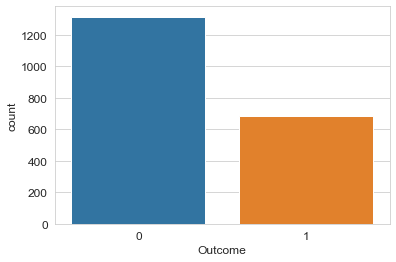

In [49]:
data.Outcome.value_counts()
sns.countplot("Outcome",data=data)

In [50]:
print(data.Outcome.value_counts(0))

0    1316
1     684
Name: Outcome, dtype: int64


There are 1316 non-diabetic cases and 684 diabetic cases in the dataset. More than 60% of the data contians non-diabetic cases. For this reason it is important to apply balancing techniques that even out the ratio of diabetic and non-diabetic cases. This will ensure that the results produced are not bias towards the majority class (non-diabetic cases).

### Splitting the Data

In [51]:
from sklearn.model_selection import train_test_split
Y = data['Outcome']
X = data.drop(columns=['Outcome'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=9)

In [52]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (1200, 8)
Y train shape:  (1200,)
X test shape:  (800, 8)
Y test shape:  (800,)


In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
print("Train_X: ",X_train.shape)
print("Train_Y: ",Y_train.shape)
print("Test_X: ",X_test.shape)
print("Test_Y: ",Y_test.shape)

print('\n')
print('............')
print('\n')


smote= SMOTE(sampling_strategy='minority')
Train_X_smote,Train_Y_smote=smote.fit_resample(X_train, Y_train)
Test_X_smote, Test_Y_smote = X_test, Y_test

print("Train_X_smote: ",Train_X_smote.shape)
print("Train_Y_smote: ",Train_Y_smote.shape)
print("Test_X_smote: ",Test_X_smote.shape)
print("Test_Y_smote: ",Test_Y_smote.shape)

Train_X:  (1200, 8)
Train_Y:  (1200,)
Test_X:  (800, 8)
Test_Y:  (800,)


............


Train_X_smote:  (1590, 8)
Train_Y_smote:  (1590,)
Test_X_smote:  (800, 8)
Test_Y_smote:  (800,)


In [54]:
print("Train_X: ",X_train.shape)
print("Train_Y: ",Y_train.shape)
print("Test_X: ",X_test.shape)
print("Test_Y: ",Y_test.shape)

print('\n')
 

adasyn= ADASYN(sampling_strategy='minority')
Train_X_adasyn,Train_Y_adasyn=adasyn.fit_resample(X_train, Y_train)
Test_X_adasyn, Test_Y_adasyn = X_test, Y_test

print("Train_X_adasyn: ",Train_X_adasyn.shape)
print("Train_Y_adasyn: ",Train_Y_adasyn.shape)
print("Test_X_adasyn: ",Test_X_adasyn.shape)
print("Test_Y_adasyn: ",Test_Y_adasyn.shape)

Train_X:  (1200, 8)
Train_Y:  (1200,)
Test_X:  (800, 8)
Test_Y:  (800,)


Train_X_adasyn:  (1658, 8)
Train_Y_adasyn:  (1658,)
Test_X_adasyn:  (800, 8)
Test_Y_adasyn:  (800,)


### Supervised Machine Learning Models

In [55]:
ModelNames=[]
auc_test = []
accTest_Ys = []
precision_test = []
recall_test = []
f1_test = []

def performance(model):
    for name, model, Train_X, Train_Y, Test_X, Test_Y in model:
        
        #appending name
        ModelNames.append(name)
        
        # Build model
        model.fit(Train_X, Train_Y)
        
        #predictions
        Test_Y_pred = model.predict(Test_X)
        
        # calculate accuracy
        AccuracTest_Y = metrics.accuracy_score(Test_Y, Test_Y_pred)
        accTest_Ys.append(AccuracTest_Y)
        
        # calculate auc
        Aucs_test = metrics.roc_auc_score(Test_Y , Test_Y_pred)
        auc_test.append(Aucs_test)
        
        #precision_calculation
        Precision_score_test = metrics.precision_score(Test_Y , Test_Y_pred)
        precision_test.append(Precision_score_test)
        
        # calculate recall
        Recall_score_test = metrics.recall_score(Test_Y , Test_Y_pred)
        recall_test.append(Recall_score_test)
        
        #calculating F1
        F1Score_test = metrics.f1_score(Test_Y , Test_Y_pred)
        f1_test.append(F1Score_test)
        
        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(Test_Y, Test_Y_pred)
        
        print("Model Name :", name)
        print('Test Accuracy :{0:0.5f}'.format(AccuracTest_Y))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        print('Test Precision : {0:0.5f}'.format(Precision_score_test))
        print('Test Recall : {0:0.5f}'.format(Recall_score_test))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")

        fpr, tpr, thresholds = metrics.roc_curve(Test_Y, Test_Y_pred)
        auc = metrics.roc_auc_score(Test_Y, Test_Y_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

### 1. Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

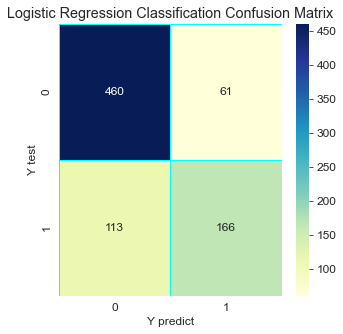

In [57]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [58]:
# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.7825


Model Name : LR SMOTE
Test Accuracy :0.65625
Test AUC : 0.67449
Test Precision : 0.50493
Test Recall : 0.73477
Test F1 : 0.59854
Confusion Matrix : 
 [[320 201]
 [ 74 205]]


Model Name : LR ADASYN 
Test Accuracy :0.61375
Test AUC : 0.65767
Test Precision : 0.46862
Test Recall : 0.80287
Test F1 : 0.59181
Confusion Matrix : 
 [[267 254]
 [ 55 224]]




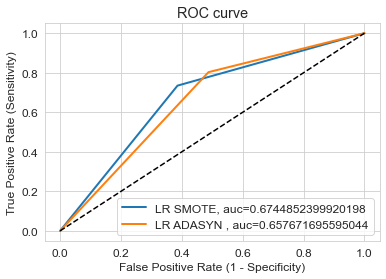

In [59]:
from sklearn.linear_model import LogisticRegression

LRmodel=[]

#LRmodel.append(('LR IMBALANCED', LogisticRegression(solver='saga',multi_class='multinomial'),Train_X, Train_Y, Test_X, Test_Y))
LRmodel.append(('LR SMOTE', LogisticRegression(solver='saga',multi_class='multinomial'),Train_X_smote, Train_Y_smote, Test_X_smote, Test_Y_smote))
LRmodel.append(('LR ADASYN ', LogisticRegression(solver='saga',multi_class='multinomial'),Train_X_adasyn, Train_Y_adasyn, Test_X_adasyn, Test_Y_adasyn))

performance(LRmodel)

In [60]:
correspondence={
    'Model': ModelNames,
    'Accuracy': accTest_Ys,
    'AUC': auc_test,
    'Precision Score' : precision_test,
    'Recall Score': recall_test, 
    'F1 Score': f1_test
}
print("Comparing performance of various Classifiers: \n \n")
correspondence=pd.DataFrame(correspondence)
correspondence.sort_values('F1 Score',ascending=False)

Comparing performance of various Classifiers: 
 



,Model,Accuracy,AUC,Precision Score,Recall Score,F1 Score
0,LR SMOTE,0.65625,0.674485,0.504926,0.734767,0.59854
1,LR ADASYN,0.61375,0.657672,0.468619,0.802867,0.59181


### 2. Decision Tree Classification

In [61]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

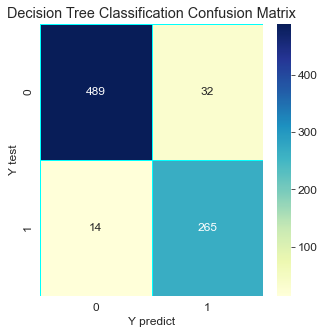

In [62]:
# The confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [63]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.9425


Model Name : DT SMOTE
Test Accuracy :0.93500
Test AUC : 0.93844
Test Precision : 0.87459
Test Recall : 0.94982
Test F1 : 0.91065
Confusion Matrix : 
 [[483  38]
 [ 14 265]]


Model Name : DT ADASYN
Test Accuracy :0.93625
Test AUC : 0.93857
Test Precision : 0.88000
Test Recall : 0.94624
Test F1 : 0.91192
Confusion Matrix : 
 [[485  36]
 [ 15 264]]




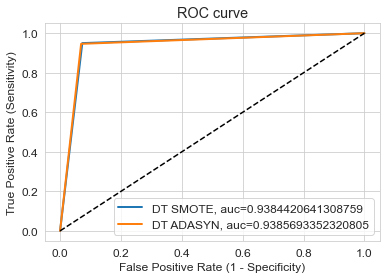

In [64]:
from sklearn.tree import DecisionTreeClassifier

DTmodel = []

#DTmodel.append(('DT IMBALANCED', DecisionTreeClassifier(),Train_X,Train_Y,Test_X,Test_Y))
DTmodel.append(('DT SMOTE', DecisionTreeClassifier(),Train_X_smote, Train_Y_smote, Test_X_smote, Test_Y_smote))
DTmodel.append(('DT ADASYN', DecisionTreeClassifier() ,Train_X_adasyn, Train_Y_adasyn, Test_X_adasyn, Test_Y_adasyn))

performance(DTmodel)

In [65]:
correspondence={
    'Model': ModelNames,
    'Accuracy': accTest_Ys,
    'AUC': auc_test,
    'Precision Score' : precision_test,
    'Recall Score': recall_test, 
    'F1 Score': f1_test
}
print("Comparing performance of various Classifiers: \n \n")
correspondence=pd.DataFrame(correspondence)
correspondence.sort_values('F1 Score',ascending=False)

Comparing performance of various Classifiers: 
 



,Model,Accuracy,AUC,Precision Score,Recall Score,F1 Score
3,DT ADASYN,0.93625,0.938569,0.880000,0.946237,0.911917
2,DT SMOTE,0.93500,0.938442,0.874587,0.949821,0.910653
0,LR SMOTE,0.65625,0.674485,0.504926,0.734767,0.598540
1,LR ADASYN,0.61375,0.657672,0.468619,0.802867,0.591810


### 3. Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

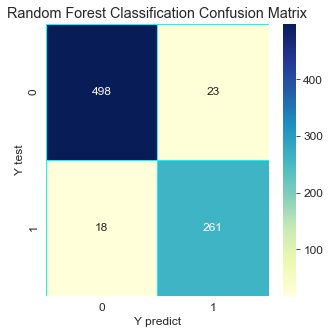

In [67]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [68]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.94875


Model Name : RF SMOTE
Test Accuracy :0.93750
Test AUC : 0.93703
Test Precision : 0.89078
Test Recall : 0.93548
Test F1 : 0.91259
Confusion Matrix : 
 [[489  32]
 [ 18 261]]


Model Name : RF ADASYN
Test Accuracy :0.93625
Test AUC : 0.93940
Test Precision : 0.87748
Test Recall : 0.94982
Test F1 : 0.91222
Confusion Matrix : 
 [[484  37]
 [ 14 265]]




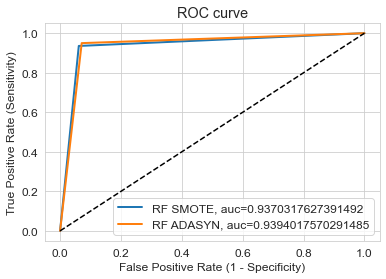

In [69]:
from sklearn.ensemble import RandomForestClassifier

RFmodel = []
#RFmodel.append(('RF IMABALANCED', RandomForestClassifier(),Train_X,Train_Y,Test_X,Test_Y))

RFmodel.append(('RF SMOTE', RandomForestClassifier(),Train_X_smote, Train_Y_smote, Test_X_smote, Test_Y_smote))
RFmodel.append(('RF ADASYN', RandomForestClassifier(),Train_X_adasyn, Train_Y_adasyn, Test_X_adasyn, Test_Y_adasyn))

performance(RFmodel)

In [70]:

correspondence={
    'Model': ModelNames,
    'Accuracy': accTest_Ys,
    'AUC': auc_test,
    'Precision Score' : precision_test,
    'Recall Score': recall_test, 
    'F1 Score': f1_test
}
print("Comparing performance of various Classifiers: \n \n")
correspondence=pd.DataFrame(correspondence)
correspondence.sort_values('F1 Score',ascending=False)

Comparing performance of various Classifiers: 
 



,Model,Accuracy,AUC,Precision Score,Recall Score,F1 Score
4,RF SMOTE,0.93750,0.937032,0.890785,0.935484,0.912587
5,RF ADASYN,0.93625,0.939402,0.877483,0.949821,0.912220
3,DT ADASYN,0.93625,0.938569,0.880000,0.946237,0.911917
2,DT SMOTE,0.93500,0.938442,0.874587,0.949821,0.910653
0,LR SMOTE,0.65625,0.674485,0.504926,0.734767,0.598540
1,LR ADASYN,0.61375,0.657672,0.468619,0.802867,0.591810
